# Question 1 : Classification using Naive Bayes

Can glucose and blood pressure data classify whether a patient has diabetes or not ? If yes, which classification algorithm should you use ?

The dataset **diabetes_classification.csv** has 3 columns and 995 entries with the above data.


1. Load the dataset.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())


   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1


2. The dataset has two feature columns and one target column. Plot a bar graph or histogram showing the distribution of values in the feature columns (count of each value).

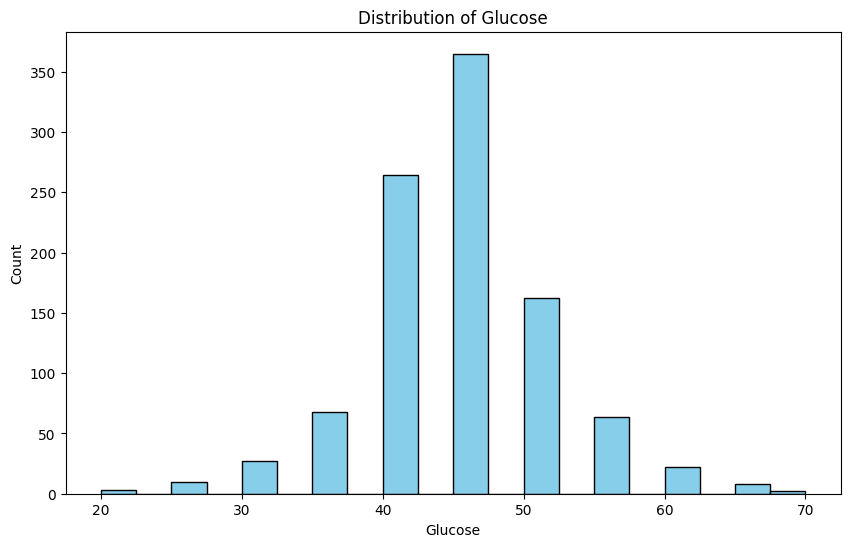

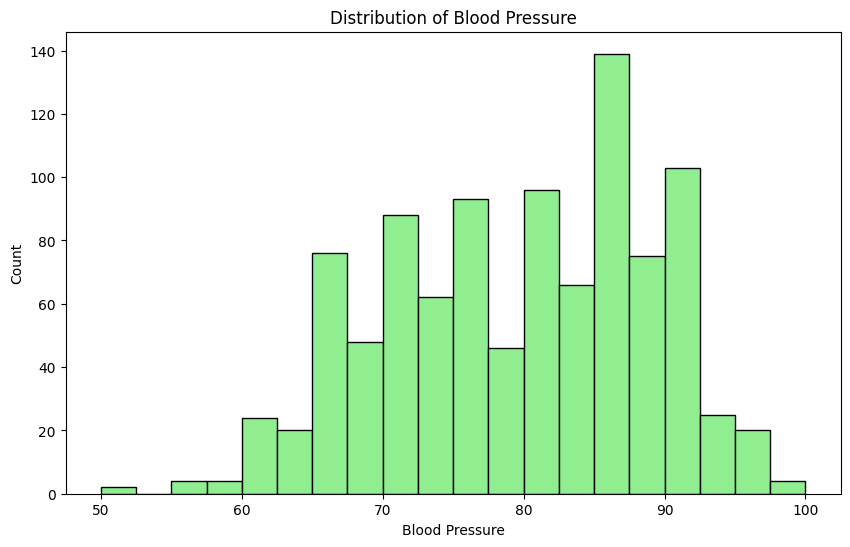

In [9]:

import matplotlib.pyplot as plt
# Plot the distribution of the 'glucose' feature
plt.figure(figsize=(10, 6))
plt.hist(df['glucose'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.title('Distribution of Glucose')
plt.show()

# Plot the distribution of the 'blood pressure' feature
plt.figure(figsize=(10, 6))
plt.hist(df['bloodpressure'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure')
plt.show()


 The feature column **glucose** has a somewhat Gaussian distribution of data. So we will try out Gaussian Naive Bayes classification for the data using Scikit-Learn.

3. Split the dataset.
4. Fit a Gaussian NB model on the data. Make predictions and find the accuracy score.

Optional :
5. Compare the model with other classification algorithms like Logistic Regression, KNN, decision tree etc.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Split the data into features (X) and target (y)
X = df[['glucose', 'bloodpressure']]
y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Gaussian Naive Bayes model on the training data
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)


Accuracy score: 0.9331103678929766


# Question 2 : Regression using SVM and Tree Algorithms

In this question, we will be using the **insurance.csv** file which contain information on insurance charges based on the following informations: age,sex,bmi,region,number of children and whether the person is a smoker or not. You need to predict the charges based on the information given.

### 1. Load the data.

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### 2. Separate the numerical and categorical columns.
### 3. Label Encode the categorical columns.
### 4. Scale the numerical columns. (Scale the charges separately so that you can calculate errors afterwards.)

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Separate numerical and categorical columns
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'region', 'smoker']

# Label encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Separate the charges column for scaling separately
charges = df['charges']
df.drop('charges', axis=1, inplace=True)

# Scale the charges column separately
charges_scaler = StandardScaler()
charges = charges_scaler.fit_transform(charges.values.reshape(-1, 1))

# Add the scaled charges column back to the DataFrame
df['charges'] = charges

# Display the updated DataFrame
print(df.head())

        age  sex       bmi  children  smoker  region   charges
0 -1.438764    0 -0.453320 -0.908614       1       3  0.298584
1 -1.509965    1  0.509621 -0.078767       0       2 -0.953689
2 -0.797954    1  0.383307  1.580926       0       2 -0.728675
3 -0.441948    1 -1.305531 -0.908614       0       1  0.719843
4 -0.513149    1 -0.292556 -0.908614       0       1 -0.776802


### 5. Split the data.

In [15]:
# Separate the features (X) and the target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training and testing sets
print("Training set dimensions:", X_train.shape)
print("Testing set dimensions:", X_test.shape)

Training set dimensions: (936, 6)
Testing set dimensions: (402, 6)


### 6. Support Vector Regressor

Here , you will use the SVR model from sklearn.svm and fit it on the training data. Then predict on the test data and calaculate MAE, MSE. But...

The SVR class contains many hyperparameters, example : kernel can have the following values : linear, rbf, poly, sigmoid.

Use **RandomizedSearchCV** from sklearn.model_selection , create a dictionary with keys 'kernel' and 'gamma' . As values of the keys, create a list of some possible values. Run a 3-fold cross validation test (cv=3) and find the best parameters. Then initiate the SVR model with those parameters.

In [17]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder






# Define the hyperparameter search space
param_dist = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Create the SVR model
svr = SVR()

# Perform randomized search cross-validation
random_search = RandomizedSearchCV(svr, param_dist, cv=3)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Initialize the SVR model with the best parameters
svr_best = SVR(kernel=best_params['kernel'], gamma=best_params['gamma'])

# Fit the SVR model on the training data
svr_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_best.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


Best Parameters: {'kernel': 'rbf', 'gamma': 0.1}
MAE: 0.20123949778738315
MSE: 0.14669529867765144


### 7. AdaBoost Regressor

We would do similar for AdaBoostRegressor from sklearn.ensemble . Here, the hyperparameters are n_estimators and loss.

Instead of RandomizedSearchCV, let's try GridSearchCV . Find the best parameters and then find errors on test data using the model with best parameters.

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder# Create the AdaBoostRegressor model
ada_boost = AdaBoostRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'loss': ['linear', 'square', 'exponential']
}
# Perform grid search cross-validation
grid_search = GridSearchCV(ada_boost, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the AdaBoostRegressor model with the best parameters
ada_boost_best = AdaBoostRegressor(n_estimators=best_params['n_estimators'], loss=best_params['loss'])

# Fit the AdaBoostRegressor model on the training data
ada_boost_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_boost_best.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

Best Parameters: {'loss': 'linear', 'n_estimators': 50}
MAE: 0.3500428431085732
MSE: 0.18487482868603086


8. Now carry the same procedure for Random Forest Regressor and for Gradient Boosting Regression.
9. Finally, use <a href="https://xgboost.readthedocs.io/en/stable/get_started.html"> XGBoost Regressor </a> and compare all the models. Comment which model had the least error (MAE and MSE).
You will be required to run  <code> !pip install xgboost </code> to import xgboost models.

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
# Define the hyperparameter search space for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Perform grid search cross-validation for Random Forest Regressor
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters for Random Forest Regressor
rf_best_params = rf_grid_search.best_params_
print("Random Forest Best Parameters:", rf_best_params)

# Initialize the Random Forest Regressor model with the best parameters
rf_best = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                max_depth=rf_best_params['max_depth'],
                                min_samples_split=rf_best_params['min_samples_split'])

# Fit the Random Forest Regressor model on the training data
rf_best.fit(X_train, y_train)

# Make predictions on the test data using Random Forest Regressor
rf_y_pred = rf_best.predict(X_test)

# Calculate MAE and MSE for Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)

print("Random Forest MAE:", rf_mae)
print("Random Forest MSE:", rf_mse)

# Define the hyperparameter search space for Gradient Boosting Regression
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create the Gradient Boosting Regression model
gb = GradientBoostingRegressor()

# Perform grid search cross-validation for Gradient Boosting Regression
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=3)
gb_grid_search.fit(X_train, y_train)

# Get the best parameters for Gradient Boosting Regression
gb_best_params = gb_grid_search.best_params_
print("Gradient Boosting Best Parameters:", gb_best_params)

# Initialize the Gradient Boosting Regression model with the best parameters
gb_best = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                    learning_rate=gb_best_params['learning_rate'],
                                    max_depth=gb_best_params['max_depth'],
                                    min_samples_split=gb_best_params['min_samples_split'])

# Fit the Gradient Boosting Regression model on the training data
gb_best.fit(X_train, y_train)

# Make predictions on the test data using Gradient Boosting Regression
gb_y_pred = gb_best.predict(X_test)

# Calculate MAE and MSE for Gradient Boosting Regression
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)

print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting MSE:", gb_mse)

Random Forest Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest MAE: 0.20777198287576468
Random Forest MSE: 0.12967871205141646
Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Gradient Boosting MAE: 0.21406414919434325
Gradient Boosting MSE: 0.12970739814242896


# Question 3 : Classification using SVM and Tree Algorithms

In this question, we will be using the **bookmyshow_ads.csv** file which contain information on whether an url is spam or not based on 32 features. You need to classify the url as spam or not spam based on the information given.

### 1. Load the data.

  index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0     1                           0              1                   1   
1     2                           1              1                   1   
2     3                           1             -1                   1   
3     4                           1             -1                   1   
4     5                           1             -1                   0   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                         0              0   
1                 1                         1              0   
2                 1                         1              0   
3                 1                         1              0   
4                 1                         1              0   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                  0               0                            0  ...   
1                 -1  

### 2. Split the data.

### 3. Model Comparison

Similar to the previous question, use the following classifier models from sklearn and compare them:
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

For each model, you may also try to find the best hyperparameters using GridSearch Cross Validation or RandomizedSearch Cross Validation.

# Question 4 : Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

The csv file **segmentation data.csv** contains basic data about some customers like Customer ID, age, gender, annual income and spending score. You want to classify the customers into different groups so that marketing strategy could be planned in the future accordingly. How many different groups should be made ? What should be the approach ?

This is an Unsupervised Learning question since it doesn't provide you with labels - the groups.

### 1. Import the necessary modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


### 2. Read the csv file "segmentation data.csv" present in the Github repository as a Pandas DataFrame.

In [37]:
# Assuming the "segmentation data.csv" file is in the current directory
df = pd.read_csv('segmentation data.csv')

# Display the first few rows of the data
print(df.head())


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


### 3. Do the necessary preprocessing of the data.

> Drop unwanted columns.

> Check for null values.

> Scale the numerical columns.

> Additionally, you may also make the Age column have categorical values. How ? Apply some function that makes age groups turns all ages in some group to a particular number !

Note : Don't do everything in a single code block ! Do it step-by-step and show output for each step.

In [38]:
# Drop unwanted columns (assuming 'Customer ID' is unwanted)
df.drop('ID', axis=1, inplace=True)

# Check for null values
print(df.isnull().sum())

# Fill missing values with mean or any other suitable strategy
df.fillna(df.mean(), inplace=True)

# Scale the numerical columns
scaler = StandardScaler()
numerical_cols = ['Age', 'Income']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Convert Age column to categorical values
age_bins = [0, 25, 35, 50, np.inf]
age_labels = [1, 2, 3, 4]  # Assigning numbers to age groups
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Display the updated DataFrame
print(df.head())


Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64
   Sex  Marital status  Age  Education    Income  Occupation  Settlement size
0    0               0    1          2  0.097524           1                2
1    1               1  NaN          1  0.782654           1                2
2    0               0    1          1 -0.833202           0                0
3    0               0    1          1  1.328386           1                1
4    0               0    1          1  0.736932           1                1


### 4. KMeans Model Training - Scikit-Learn

At first, let's try to implement KMeans Clustering using sklearn.clusters.KMeans .

How to decide for the value 'K' ?

Read the following blog. It provides different ways of evaluating clustering algorithms.

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters

We will be looking on two methods : Elbow Method, Silhouette Analysis.

**Make a list of values for K , ranging from 2 to 10. For each K, fit a model, calculate the inertia and silhouette scores. Plot them. Decide which value of K is optimal !**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

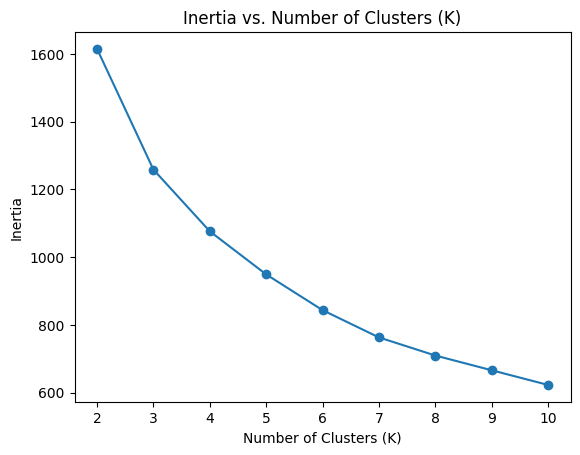

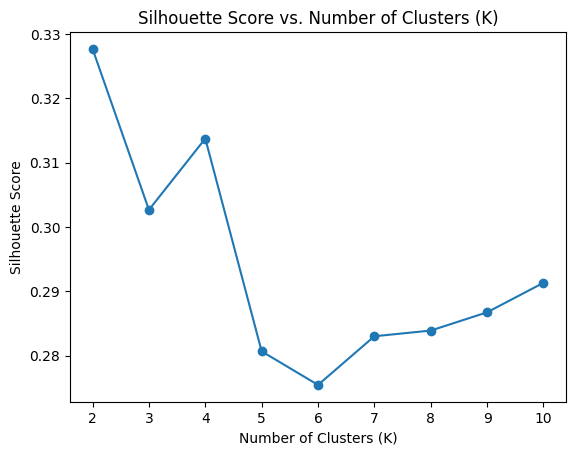

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Drop rows with missing values
df.dropna(inplace=True)

# Scale the numerical columns (assuming you have numerical columns to scale)
# Apply any necessary scaling technique, such as StandardScaler or MinMaxScaler

# Define the range of K values
K_values = list(range(2, 11))
inertia_scores = []
silhouette_scores = []

# Fit KMeans model for each K value
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_scores.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

# Plot the inertia scores
plt.plot(K_values, inertia_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters (K)')
plt.show()

# Plot the silhouette scores
plt.plot(K_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.show()


### 5. KMeans Model Prediction

Once you decided the optimal K, once again fit a model with that K value and store the silhouette score and the labels for the entire data.

It is observed that the optimal value of k is 4. So, let's store the values of inertia and labels for k=4.

In [44]:
# Fit a KMeans model with optimal K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

# Store silhouette score and labels for the entire data
silhouette_score_optimal_k = silhouette_score(df, kmeans.labels_)
labels_optimal_k = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 6. KMeans Model Training - Scratch

Now, code the KMeans Model from scratch. Train it on the data, and try to find out when you have the labels with maximum accuracy when compared to the labels of the SkLearn model.

In [48]:
import numpy as np

# Helper function to calculate distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def kmeans_scratch(data, k, max_iters=100, random_seed=None):
    np.random.seed(random_seed)
    n_samples, n_features = data.shape
    centroids_indices = np.random.choice(n_samples, k, replace=False)
    centroids = data[centroids_indices]
    labels = np.zeros(n_samples)

    for _ in range(max_iters):
        # Assign samples to nearest centroid
        for i in range(n_samples):
            distances = np.zeros(k)
            for j in range(k):
                distances[j] = euclidean_distance(data[i], centroids[j])
            labels[i] = np.argmin(distances)

        # Update centroids
        for j in range(k):
            cluster_samples = data[labels == j]
            if len(cluster_samples) > 0:
                centroids[j] = np.mean(cluster_samples, axis=0)

    return labels, centroids

# Usage example
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
k = 2

labels, centroids = kmeans_scratch(data, k)
print("Labels:", labels)
print("Centroids:", centroids)



Labels: [0. 0. 1. 1. 0. 1.]
Centroids: [[1.16666667 1.46666667]
 [7.33333333 9.        ]]


### 7. DBSCAN model training - Scikit-Learn

Using sklear.clusters.DBSCAN, you have to fit a model on the data.

But, here we would like to deal with two hyperparameters : epsilon and minimum number of samples.

Make two lists. One with some probable values for epsilon, other with probable values for min_samples.

Example : eps= [0.1,0.2,0.5,1,2] , min_samples=[3,4,5,6]

Run a nested loop. for each value of eps and min_samples, fit a dbscan model on the data and calculate the silhouette score. Find the parameters for which the silhouette score is maximum.

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]
max_silhouette_score = -1
optimal_eps = None
optimal_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        if len(np.unique(labels)) > 1:  # Skip if all points are considered outliers
            silhouette = silhouette_score(data, labels)
            if silhouette > max_silhouette_score:
                max_silhouette_score = silhouette
                optimal_eps = eps
                optimal_min_samples = min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)
        if len(np.unique(labels)) > 1:  # Skip if all points are considered outliers
            silhouette = silhouette_score(data, labels)
            if silhouette > max_silhouette_score:
                max_silhouette_score = silhouette
                optimal_eps = eps
                optimal_min_samples = min_samples
print("Optimal Epsilon:", optimal_eps)
print("Optimal Min Samples:", optimal_min_samples)
print("Max Silhouette Score:", max_silhouette_score)


Optimal Epsilon: 2
Optimal Min Samples: 3
Max Silhouette Score: 0.7479566620911685


### 8. DBSCAN model training - Scratch

Code the DBScan model. For the same epsilon and min_samples values, fit the model on the data. You should receive the same silhouette score.

In [50]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
labels = dbscan.fit_predict(data)
silhouette = silhouette_score(data, labels)
print("Silhouette Score with Optimal Hyperparameters:", silhouette)


Silhouette Score with Optimal Hyperparameters: 0.7479566620911685
